In [ ]:
!python.exe -m pip install --upgrade pip

  Using cached pip-25.3-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.3-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 25.2
    Uninstalling pip-25.2:
      Successfully uninstalled pip-25.2


In [1]:
%pip install xgboost lightgbm catboost pandas scikit-learn django

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 45.1 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:


import pandas as pd
import json
import logging
import sys
from datetime import datetime
from pathlib import Path
import joblib
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [4]:
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")
logger = logging.getLogger(__name__)

In [5]:
def project_root() -> Path:
    """
    Retorna a raiz do projeto a partir deste arquivo.
    Evita problemas quando __file__ não existe (ex.: notebooks).
    """
    try:
        return Path(__file__).resolve().parent
    except NameError:
        # Fallback: diretório atual
        return Path.cwd()

In [ ]:
from IntegracaoBd_ML import carregar_dataset_final
df = carregar_dataset_final()
target

Dataset carregado de C:\Users\vish8\OneDrive\Desktop\p8\C214\Lab\Aluga_Ai\aluga_ai_web\Dados\processed\dataset_final.csv. Shape: (16928, 46)


In [6]:
df = pd.read_csv('/content/drive/MyDrive/AlvaroSampaio/TesteAirbnb/Regressao/dataset_final.csv')
df.head()

,quartos,banheiros,vagas_garagem,area_m2,nota_media,camas,condominio,iptu,max_hospedes,tempo_anuncio_meses,...,endereco_bairro_Trindade,tipo_Casa,politica_cancelamento_Moderada,politica_cancelamento_Rigorosa,tipo_cama_Casal,tipo_cama_King,tipo_cama_Queen,tipo_cama_Sofá-cama,tipo_cama_Solteiro,status_inativo
0,-0.701694,1.374138,-0.402685,-0.083757,-1.070902,0.004056,0.509846,-0.263342,-0.525416,1.26303,...,False,False,False,False,True,False,False,False,False,True
1,-0.701694,1.374138,-0.402685,-0.083757,-1.070902,0.004056,0.509846,-0.263342,-0.525416,1.26303,...,False,False,False,False,True,False,False,False,False,True
2,-0.701694,1.374138,-0.402685,-0.083757,-1.070902,0.004056,0.509846,-0.263342,-0.525416,1.26303,...,False,False,False,False,True,False,False,False,False,True
3,-0.701694,1.374138,-0.402685,-0.083757,-1.070902,0.004056,0.509846,-0.263342,-0.525416,1.26303,...,False,False,False,False,True,False,False,False,False,True
4,-0.701694,1.374138,-0.402685,-0.083757,-1.070902,0.004056,0.509846,-0.263342,-0.525416,1.26303,...,False,False,False,False,True,False,False,False,False,True


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   quartos                         16928 non-null  float64
 1   banheiros                       16928 non-null  float64
 2   vagas_garagem                   16928 non-null  float64
 3   area_m2                         16928 non-null  float64
 4   nota_media                      16928 non-null  float64
 5   camas                           16928 non-null  float64
 6   condominio                      16928 non-null  float64
 7   iptu                            16928 non-null  float64
 8   max_hospedes                    16928 non-null  float64
 9   tempo_anuncio_meses             16928 non-null  float64
 10  latitude                        16928 non-null  float64
 11  longitude                       16928 non-null  float64
 12  disp_alta_demanda               

In [8]:
X = df.drop("disp_preco_aluguel", axis=1)  # Substitua "target_column" pelo nome real da coluna alvo
y = df["disp_preco_aluguel"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
import os
import joblib
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Caminho da pasta para salvar os modelos
pastas_modelos = '/content/drive/MyDrive/AlvaroSampaio/TesteAirbnb/Regressao/modelos'
os.makedirs(pastas_modelos, exist_ok=True)

# Dicionário de modelos
modelos = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0),
    'LightGBM': LGBMRegressor(random_state=42, verbose=-1),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor()
}

resultados = []
melhor_modelo = None
melhor_rmse = float('inf')

print("🚀 Iniciando treinamento dos modelos...\n")

for nome, modelo in modelos.items():
    print(f"Treinando modelo: {nome}...")
    modelo.fit(X_train, y_train)

    print(f" - Realizando predições com {nome}...")
    y_pred = modelo.predict(X_test)

    # Compatibilidade com versões antigas do sklearn
    try:
        rmse = mean_squared_error(y_test, y_pred, squared=False)
    except TypeError:
        rmse = mean_squared_error(y_test, y_pred) ** 0.5

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f" - {nome} -> MAE={mae:.2f}, RMSE={rmse:.2f}, R2={r2:.3f}\n")

    resultados.append({'Modelo': nome, 'MAE': mae, 'RMSE': rmse, 'R2': r2})

    if rmse < melhor_rmse:
        melhor_rmse = rmse
        melhor_modelo = (nome, modelo)

print("✅ Treinamento concluído!\n")

# Exibir resultados comparativos
df_resultados = pd.DataFrame(resultados).sort_values('RMSE')
print("📊 Resultados comparativos:")
print(df_resultados)

# Salvar o melhor modelo
nome_melhor, modelo_melhor = melhor_modelo
caminho_do_arquivo = os.path.join(pastas_modelos, f"melhor_modelo_{nome_melhor}.pkl")
joblib.dump(modelo_melhor, caminho_do_arquivo)

print(f"\n🏆 Melhor modelo: {nome_melhor}")
print(f"📁 Caminho salvo: {caminho_do_arquivo}")


🚀 Iniciando treinamento dos modelos...

Treinando modelo: RandomForest...
 - Realizando predições com RandomForest...
 - RandomForest -> MAE=6.65, RMSE=159.01, R2=1.000

Treinando modelo: XGBoost...
 - Realizando predições com XGBoost...
 - XGBoost -> MAE=33.39, RMSE=371.48, R2=0.998

Treinando modelo: LightGBM...
 - Realizando predições com LightGBM...
 - LightGBM -> MAE=42.56, RMSE=350.82, R2=0.998

Treinando modelo: CatBoost...
 - Realizando predições com CatBoost...
 - CatBoost -> MAE=53.41, RMSE=342.32, R2=0.998

Treinando modelo: LinearRegression...
 - Realizando predições com LinearRegression...
 - LinearRegression -> MAE=1716.52, RMSE=2685.71, R2=0.876

Treinando modelo: Ridge...
 - Realizando predições com Ridge...
 - Ridge -> MAE=1716.53, RMSE=2686.28, R2=0.876

Treinando modelo: Lasso...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.159e+09, tolerance: 7.499e+07
  model = cd_fast.enet_coordinate_descent(


 - Realizando predições com Lasso...
 - Lasso -> MAE=1714.82, RMSE=2687.45, R2=0.876

Treinando modelo: SVR...
 - Realizando predições com SVR...
 - SVR -> MAE=5287.99, RMSE=7642.54, R2=-0.004

Treinando modelo: KNN...
 - Realizando predições com KNN...
 - KNN -> MAE=823.24, RMSE=2053.25, R2=0.928

✅ Treinamento concluído!

📊 Resultados comparativos:
             Modelo          MAE         RMSE        R2
0      RandomForest     6.650411   159.014430  0.999565
3          CatBoost    53.408310   342.322738  0.997985
2          LightGBM    42.562398   350.815286  0.997884
1           XGBoost    33.386753   371.475647  0.997627
8               KNN   823.241051  2053.247736  0.927518
4  LinearRegression  1716.519920  2685.709539  0.875988
5             Ridge  1716.534795  2686.281263  0.875935
6             Lasso  1714.815110  2687.446542  0.875827
7               SVR  5287.988767  7642.536775 -0.004203

🏆 Melhor modelo: RandomForest
📁 Caminho salvo: /content/drive/MyDrive/AlvaroSampaio/Te

===== 🔹 Desempenho em Treino =====
MAE:  1.5180
RMSE: 31.9095
R²:   1.0000

===== 🔹 Desempenho em Teste =====
MAE:  6.6504
RMSE: 159.0144
R²:   0.9996


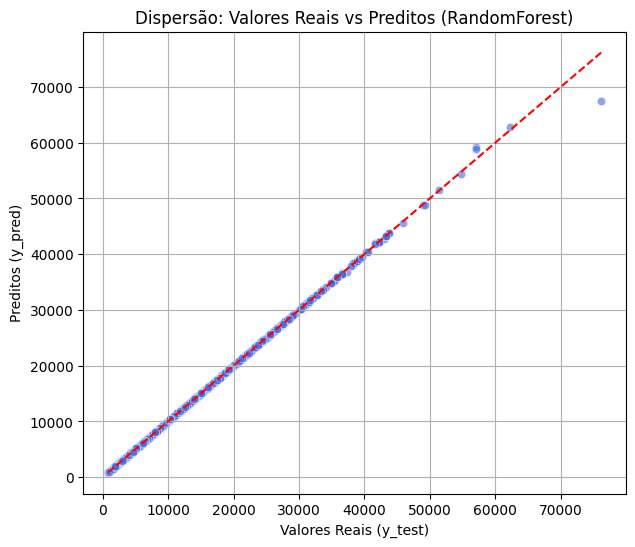

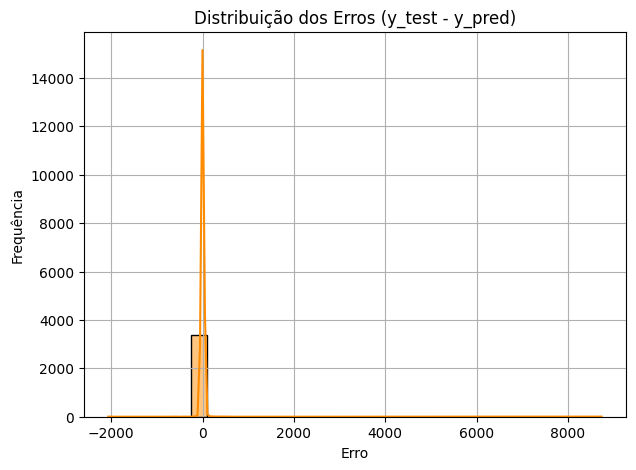

/tmp/ipython-input-1678310820.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:10], y=features[indices][:10], palette='viridis')


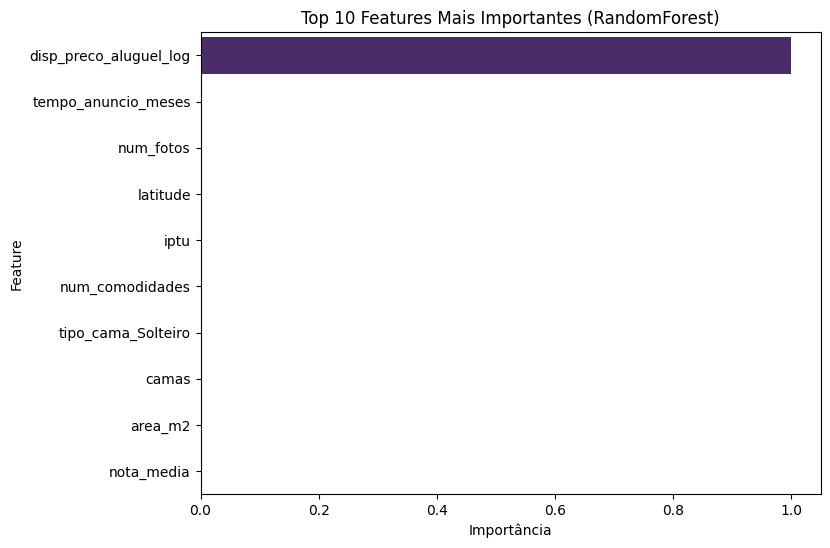

In [13]:
# ===============================================
# 🔍 Avaliação detalhada do melhor modelo (RandomForest)
# ===============================================
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Recarrega o modelo salvo (garantia)
from joblib import load
caminho_melhor_modelo = '/content/drive/MyDrive/AlvaroSampaio/TesteAirbnb/Regressao/modelos/melhor_modelo_RandomForest.pkl'
modelo_rf = load(caminho_melhor_modelo)

# Predições em treino e teste
y_pred_train = modelo_rf.predict(X_train)
y_pred_test = modelo_rf.predict(X_test)

# Métricas de treino
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

# Métricas de teste
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print("===== 🔹 Desempenho em Treino =====")
print(f"MAE:  {mae_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R²:   {r2_train:.4f}")

print("\n===== 🔹 Desempenho em Teste =====")
print(f"MAE:  {mae_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²:   {r2_test:.4f}")

# ===============================================
# 📈 1. Gráfico de Dispersão (y_test vs y_pred)
# ===============================================
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores Reais (y_test)")
plt.ylabel("Preditos (y_pred)")
plt.title("Dispersão: Valores Reais vs Preditos (RandomForest)")
plt.grid(True)
plt.show()

# ===============================================
# 📊 2. Distribuição dos Erros
# ===============================================
erros = y_test - y_pred_test
plt.figure(figsize=(7,5))
sns.histplot(erros, bins=30, kde=True, color='darkorange')
plt.title("Distribuição dos Erros (y_test - y_pred)")
plt.xlabel("Erro")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

# ===============================================
# 🧠 3. Feature Importance (importância das variáveis)
# ===============================================
importances = modelo_rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(8,6))
sns.barplot(x=importances[indices][:10], y=features[indices][:10], palette='viridis')
plt.title("Top 10 Features Mais Importantes (RandomForest)")
plt.xlabel("Importância")
plt.ylabel("Feature")
plt.show()

===== 🔁 Validação Cruzada (5 Folds) =====
R² médio:  0.9999  ± 0.0002
RMSE médio: 71.61  ± 54.95


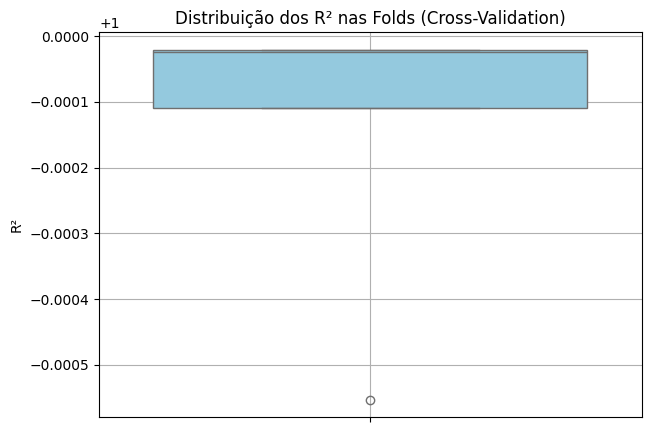

In [14]:
# ===============================================
# 🔁 Validação Cruzada (K-Fold)
# ===============================================
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Definir K-Fold com 5 divisões
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Calcular R² e RMSE médio nas 5 folds
r2_scores = cross_val_score(modelo_rf, X_train, y_train, cv=kf, scoring='r2')
rmse_scores = np.sqrt(-cross_val_score(modelo_rf, X_train, y_train, cv=kf, scoring='neg_mean_squared_error'))

print("===== 🔁 Validação Cruzada (5 Folds) =====")
print(f"R² médio:  {r2_scores.mean():.4f}  ± {r2_scores.std():.4f}")
print(f"RMSE médio: {rmse_scores.mean():.2f}  ± {rmse_scores.std():.2f}")

# Plotar a variação dos resultados entre as folds
plt.figure(figsize=(7,5))
sns.boxplot(y=r2_scores, color='skyblue')
plt.title("Distribuição dos R² nas Folds (Cross-Validation)")
plt.ylabel("R²")
plt.grid(True)
plt.show()
